In [1]:
# pip installs
!pip install lightgbm

In [2]:
# Imports
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import gc
from IPython.display import display

# Sci-kit Learn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# LightGBM
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [3]:
# Load file
df = pd.read_csv("all_merged_sw.csv", 
                 usecols=['post_id', 'date', 'sw_8_num_comments', 'sw_8_score', 'sw_8_total_awards',
                          'author_commentkarma', 'sw_8_compound_score', 'author_id', 'author_name',
                          'ticker', 'post_type', 'adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
                          'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X', 
                          'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
                          'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
                          'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
                          'adjclose_1_X', 'adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                          'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y',
                          'adjclose_9_Y', 'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y',
                          'adjclose_13_Y', 'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                          'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y',
                          'adjclose_21_Y'])

df

,post_id,date,author_commentkarma,author_id,author_name,ticker,post_type,adjclose_20_X,adjclose_19_X,adjclose_18_X,...,adjclose_16_Y,adjclose_17_Y,adjclose_18_Y,adjclose_19_Y,adjclose_20_Y,adjclose_21_Y,sw_8_num_comments,sw_8_score,sw_8_total_awards,sw_8_compound_score
0,ed1i6xt,2019-01-01,1855.0,a36tf,gundeck925,CONE,comment,52.026543,51.579323,50.899178,...,47.221077,46.967300,49.223080,49.345276,50.144196,50.943123,2.000000,9.000000,0.000000,0.202300
1,ed0rsq9,2019-01-01,8101.0,54sdn,turbotoast,CACC,comment,410.399994,412.209991,403.850006,...,405.570007,409.929993,411.890015,408.670013,414.369995,398.019989,1.000000,3.000000,0.000000,0.458800
2,ed149cc,2019-01-01,234162.0,6lvmmbl,Shmokesshweed,WSBC,comment,38.873425,39.189323,38.214558,...,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271,9.400000,9.800000,0.000000,-0.082100
3,ed0rg2j,2019-01-01,744.0,2dk1wq99,nightman_123,WSBC,comment,38.873425,39.189323,38.214558,...,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271,9.400000,9.800000,0.000000,-0.082100
4,abjmvm,2019-01-01,744.0,2dk1wq99,nightman_123,WSBC,submission,38.873425,39.189323,38.214558,...,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271,9.400000,9.800000,0.000000,-0.082100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940780,ghmym1x,2020-12-31,4431.0,vh0ilgz,MerganzerMunson,ADES,comment,5.650000,6.020000,5.830000,...,5.440000,5.500000,5.250000,5.190000,5.070000,5.120000,7.052632,29.263158,2.000000,0.209889
940781,ghmym1x,2020-12-31,4431.0,vh0ilgz,MerganzerMunson,JAN,comment,4.270000,4.500000,4.620000,...,5.230000,6.450000,9.520000,12.990000,9.010000,9.400000,5.394737,18.026316,1.078947,0.271034
940782,ghmynsf,2020-12-31,4431.0,vh0ilgz,MerganzerMunson,FEYE,comment,15.030000,15.360000,15.120000,...,22.100000,21.660000,21.360001,21.150000,21.000000,21.590000,4.785235,33.624161,0.241611,0.101989
940783,ghmiiu6,2020-12-31,22288.0,bgruy,DeadSol,WSBC,comment,28.073952,29.172199,29.535013,...,31.255468,30.720339,28.926668,29.550983,28.738380,29.313148,46.172365,30.935597,0.091335,0.057666


In [4]:
# Print the colum names
df.columns.values

array(['post_id', 'date', 'author_commentkarma', 'author_id',
       'author_name', 'ticker', 'post_type', 'adjclose_20_X',
       'adjclose_19_X', 'adjclose_18_X', 'adjclose_17_X', 'adjclose_16_X',
       'adjclose_15_X', 'adjclose_14_X', 'adjclose_13_X', 'adjclose_12_X',
       'adjclose_11_X', 'adjclose_10_X', 'adjclose_9_X', 'adjclose_8_X',
       'adjclose_7_X', 'adjclose_6_X', 'adjclose_5_X', 'adjclose_4_X',
       'adjclose_3_X', 'adjclose_2_X', 'adjclose_1_X', 'adjclose_2_Y',
       'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y', 'adjclose_6_Y',
       'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
       'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y', 'adjclose_14_Y',
       'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y', 'adjclose_18_Y',
       'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y',
       'sw_8_num_comments', 'sw_8_score', 'sw_8_total_awards',
       'sw_8_compound_score'], dtype=object)

In [5]:
# Find the min and max at 1-4 business week intervals
df['5day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmin(axis=1)

df['10day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmin(axis=1)

df['15day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmin(axis=1)

df['20day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmin(axis=1)

df['5day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmax(axis=1)

df['10day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmax(axis=1)

df['15day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmax(axis=1)

df['20day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmax(axis=1)

# Extract the day number and convert to int
df['5day_min'] = df['5day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_min'] = df['10day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_min'] = df['15day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_min'] = df['20day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['5day_max'] = df['5day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_max'] = df['10day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_max'] = df['15day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_max'] = df['20day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)

In [6]:
# Get the X-variable columns
df_X = df[['sw_8_num_comments', 'sw_8_score', 'sw_8_total_awards', 'author_commentkarma',
           'sw_8_compound_score', 'adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
           'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X',
           'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
           'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
           'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
           'adjclose_1_X']].to_numpy()

# Get the Y-variable columns
df_Y = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y',
           'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y',
           'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
           'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y',
           'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y',
           '5day_min', '10day_min', '15day_min', '20day_min', '5day_max',
           '10day_max', '15day_max', '20day_max']].to_numpy()

# Clear up memory
del df
gc.collect()

# Get 80% of the data by date
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2,
                                                    shuffle=False)

# Print
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[2.00000000e+00 9.00000000e+00 0.00000000e+00 ... 5.21383438e+01
  5.16911278e+01 5.03215179e+01]
 [1.00000000e+00 3.00000000e+00 0.00000000e+00 ... 4.18190002e+02
  4.23570007e+02 4.24119995e+02]
 [9.40000000e+00 9.80000000e+00 0.00000000e+00 ... 3.72127113e+01
  3.70953789e+01 3.65989647e+01]
 ...
 [2.01587302e+00 9.55555556e+00 3.17460317e-02 ... 1.28885635e+02
  1.27827332e+02 1.28855957e+02]
 [4.79452055e+00 1.60136986e+01 5.47945205e-02 ... 2.11000004e+01
  2.15900002e+01 2.43500004e+01]
 [1.86666667e+01 8.53333333e+01 1.00000000e+00 ... 7.15000010e+00
  7.07999992e+00 6.69999981e+00]]
[[ 2.4137931   5.68965517  0.10344828 ...  4.40999985  4.36000013
   4.3499999 ]
 [58.53735551 31.35184663  0.07386524 ... 21.76743317 22.11540222
  21.88342476]
 [ 2.875       6.5         0.         ...  2.04999995  2.05999994
   2.1099999 ]
 ...
 [ 4.7852349  33.62416107  0.24161074 ... 14.81000042 14.27000046
  13.63000011]
 [46.17236534 30.93559719  0.09133489 ... 22.61213112 24.74979019
  24.

In [7]:
# Initialize Model
model = LGBMRegressor(n_estimators=1000)

# Wrap Model for Multiple Outputs
wrapper = MultiOutputRegressor(model).fit(X_train, y_train)

# Wrapper Prediction
ypred = wrapper.predict(X_test)

In [8]:
# Evaluate RMSE
rmse = mean_squared_error(y_test, ypred, multioutput='raw_values', squared=False)

# For each value in rmse
for i in range(1, len(rmse)+1):

    # Print the RMSE values for adjClose
    if i < 21:
        print("The RMSE for adjClose_{}_Y = ".format(i+1), rmse[i-1])

    # Print the RMSE values for min day
    elif 21 <= i < 25:
        print("The RMSE for {}day_min = ".format((i-20)*5), rmse[i-1])

    # Print the RMSE for max day
    else:
        print("The RMSE for {}day_max = ".format((i-24)*5), rmse[i-1])

The RMSE for adjClose_2_Y =  43.29712608289893
The RMSE for adjClose_3_Y =  43.20530102657055
The RMSE for adjClose_4_Y =  42.811270260955745
The RMSE for adjClose_5_Y =  43.1913254307465
The RMSE for adjClose_6_Y =  47.39520158160607
The RMSE for adjClose_7_Y =  49.51367453373309
The RMSE for adjClose_8_Y =  49.61283711352049
The RMSE for adjClose_9_Y =  53.026322018879966
The RMSE for adjClose_10_Y =  53.04771167963579
The RMSE for adjClose_11_Y =  56.56845581473216
The RMSE for adjClose_12_Y =  57.73010741794566
The RMSE for adjClose_13_Y =  60.29550964749185
The RMSE for adjClose_14_Y =  58.22701549613722
The RMSE for adjClose_15_Y =  61.30268604510261
The RMSE for adjClose_16_Y =  61.49251623816399
The RMSE for adjClose_17_Y =  63.82477118320362
The RMSE for adjClose_18_Y =  64.81334263956519
The RMSE for adjClose_19_Y =  65.79376511984631
The RMSE for adjClose_20_Y =  65.20279770389509
The RMSE for adjClose_21_Y =  68.56115000591501
The RMSE for 5day_min =  1.6291058685045516
The

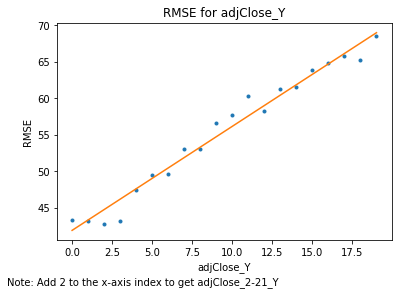

In [9]:
# Plot the RMSE for adjClose
x = np.arange(20)
y = rmse[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('RMSE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('RMSE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()

In [10]:
# Evaluate MAE
mae = mean_absolute_error(y_test, ypred, multioutput='raw_values')

# For each value in rmse
for i in range(1, len(mae)+1):

    # Print the RMSE values for adjClose
    if i < 21:
        print("The MAE for adjClose_{}_Y = ".format(i+1), mae[i-1])

    # Print the RMSE values for min day
    elif 21 <= i < 25:
        print("The MAE for {}day_min = ".format((i-20)*5), mae[i-1])

    # Print the RMSE for max day
    else:
        print("The MAE for {}day_max = ".format((i-24)*5), mae[i-1])

The MAE for adjClose_2_Y =  16.1978999258077
The MAE for adjClose_3_Y =  16.010751118830097
The MAE for adjClose_4_Y =  16.144092229678854
The MAE for adjClose_5_Y =  15.965349054109728
The MAE for adjClose_6_Y =  17.648393174584736
The MAE for adjClose_7_Y =  18.442596412455423
The MAE for adjClose_8_Y =  18.428153529616893
The MAE for adjClose_9_Y =  19.314102535234444
The MAE for adjClose_10_Y =  19.515761791547437
The MAE for adjClose_11_Y =  20.67533901974992
The MAE for adjClose_12_Y =  20.736404323731005
The MAE for adjClose_13_Y =  21.627223735835578
The MAE for adjClose_14_Y =  20.861959962656016
The MAE for adjClose_15_Y =  21.946517953457125
The MAE for adjClose_16_Y =  22.06636418926144
The MAE for adjClose_17_Y =  23.13421153163141
The MAE for adjClose_18_Y =  23.482947805608028
The MAE for adjClose_19_Y =  24.013418588197972
The MAE for adjClose_20_Y =  23.803648320325397
The MAE for adjClose_21_Y =  24.634104838225674
The MAE for 5day_min =  1.422667239974018
The MAE for

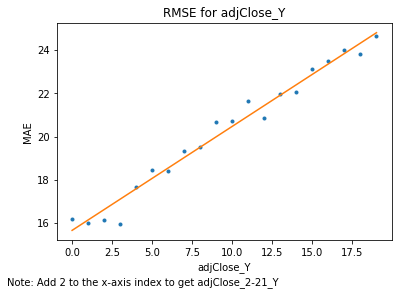

In [11]:
# Plot the MAE for adjClose
x = np.arange(20)
y = mae[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('RMSE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('MAE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()